In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Reading Data

In [52]:
def segmentWords(s): 
    return s.split()

def readFile(fileName):
    # Function for reading file
    # input: filename as string
    # output: contents of file as list containing single words
    contents = []
    f = open(fileName)
    for line in f:
        contents.append(line)
    f.close()
    result = segmentWords('\n'.join(contents))
    return result

#### Create a Dataframe containing the counts of each word in a file

In [53]:
d = []

for c in os.listdir("data_training/train"):
    directory = "data_training/train/" + c
    for f in os.listdir(directory):
        words = readFile(directory + "/" + f)
        e = {x:words.count(x) for x in words}
        e['__FileID__'] = f
        e['__CLASS__'] = c
        d.append(e)

Create a dataframe from d - make sure to fill all the nan values with zeros.

*Hint: Consider the `fillna()` function for Dataframes*

In [54]:
df = pd.DataFrame(d).fillna(0)
print("Dimensions of df:", df.shape)
df

Dimensions of df: (1400, 42776)


,,earth,goodies,if,ripley,suspend,they,white,,,...,zukovsky,zundel,zurg's,zweibel,zwick,zwick's,zwigoff's,zycie,zycie',|
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Split data into training and validation set 

* Sample 80% of your dataframe to be the training data

* Let the remaining 20% be the validation data (you can filter out the indicies of the original dataframe that weren't selected for the training data)

In [139]:
from sklearn.model_selection import train_test_split
X, y = df.drop(['__FileID__', '__CLASS__'], axis=1), df['__CLASS__']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1120, 42774) (280, 42774) (1120,) (280,)


* Split the dataframe for both training and validation data into x and y dataframes - where y contains the labels and x contains the words

*Hint: Try looking at the Dataframe `drop()` function*

# Logistic Regression

#### Basic Logistic Regression
* Use sklearn's linear_model.LogisticRegression() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

In [56]:
from sklearn import linear_model
logistic_reg = sklearn.linear_model.LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg.score(X_test,y_test)

0.8035714285714286

#### Changing Parameters

In [57]:
logistic_reg = sklearn.linear_model.LogisticRegression(intercept_scaling=0.1)
logistic_reg.fit(X_train, y_train)
logistic_reg.score(X_test, y_test)

0.8035714285714286

#### Feature Selection
* In the backward stepsize selection method, you can remove coefficients and the corresponding x columns, where the coefficient is more than a particular amount away from the mean - you can choose how far from the mean is reasonable.

*Hint: Numpy's `argwhere()` might be useful here*  
*Hint: Instead of defining a hard-coded constant to determine which features to keep or remove, consider using values relative to the distribution of the weight magnitudes*

In [58]:
def logistic_reg(X, y, norm=None):
    if norm:
        X = normalize(X, norm)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  
    logistic_reg = sklearn.linear_model.LogisticRegression(intercept_scaling=0.1)
    logistic_reg.fit(X_train, y_train)
    return logistic_reg.score(X_test, y_test)

def unnecessary_feat(X, y, norm=None):
    diff = {}
    standard = logistic_reg(X, y, norm)
    for col in X.columns:
        diff[standard - logistic_reg(X.drop(col, axis=1), y, norm)] = col
    min_diff_key = min(diff, key=float)
    return diff[min_diff_key], min_diff_key

How did you select which features to remove? Why did that reduce overfitting?

In [59]:
weights = logistic_reg.coef_
mean = weights.mean()
std = np.std(weights)

new_weights = []
for w in weights[0]:
    if w > abs(mean) or w > abs(mean):
        new_weights.append(w)

new_weights = np.asarray(new_weights)
logistic_reg.coef_ = new_weights
logistic_reg = sklearn.linear_model.LogisticRegression(intercept_scaling=0.01)
logistic_reg.fit(X_train, y_train)
logistic_reg.score(X_test, y_test)

0.8035714285714286

# Single Decision Tree

#### Basic Decision Tree

* Initialize your model as a decision tree with sklearn.
* Fit the data and labels to the model.


In [140]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
clf.score(X_train, y_train)

1.0

In [142]:
clf.score(X_test, y_test)

0.625

#### Changing Parameters
* To test out which value is optimal for a particular parameter, you can either loop through various values or look into `sklearn.model_selection.GridSearchCV`

In [143]:
max_depth = [None, 2, 5, 10]
min_samples_leaf = [1, 5, 10]
parameters = {"max_depth": max_depth,
              "min_samples_leaf": min_samples_leaf
              }
gridsearch = GridSearchCV(clf, parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

How did you choose which parameters to change and what value to give to them? Feel free to show a plot.

In [144]:
scores = gridsearch.cv_results_['mean_test_score'].reshape(len(max_depth), len(min_samples_leaf))

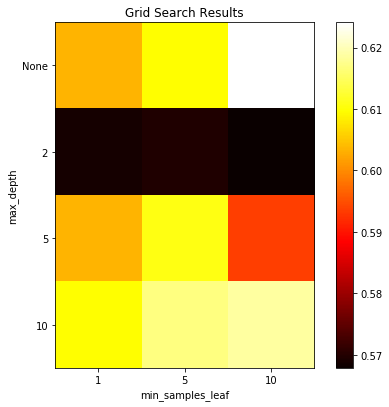

In [149]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.ylabel('max_depth')
plt.xlabel('min_samples_leaf')
plt.colorbar()
plt.yticks(np.arange(len(max_depth)), max_depth)
plt.xticks(np.arange(len(min_samples_leaf)), min_samples_leaf)
plt.title('Grid Search Results')
plt.show()

In [146]:
best_tree = gridsearch.best_estimator_ 
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [147]:
best_tree.score(X_train, y_train)

0.8660714285714286

In [148]:
best_tree.score(X_test, y_test)

0.6357142857142857

Why is a single decision tree so prone to overfitting?

# Random Forest Classifier

#### Basic Random Forest

* Use sklearn's ensemble.RandomForestClassifier() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.


#### Changing Parameters

What parameters did you choose to change and why?

How does a random forest classifier prevent overfitting better than a single decision tree?